In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("swiggy.csv")

In [3]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


## Data Dictionary
#### id: Every restraunt has a unique Id
#### name: Name of the Restraunt
#### city: City it is located
#### rating: the average rating of the particular restraunt
#### rating_count: Total number of raiting 
#### cost: Average cost of eating
#### cuisine: cusine it serves
#### lic_no: the license number
#### link: Restraunt link on swiggy website
#### address: address of the restraunt


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


### I need to increase my business so there can be few questions I might ask to get to the main moto
#### -- Most popular cuisine
#### -- City with most profit
#### End Goal is to increase the average order value 

## Data Preprocessing

#### Handling Null values
#### Unrecognized Values in Rating column
#### Handling data types and change them if required

In [5]:
df.isnull().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

#### Maximum null values in a column are 299 which is very less when compared to total number of data points hence we can drop the null values

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
lic_no          0
link            0
address         0
menu            0
dtype: int64

In [8]:
df['rating'].replace('--', np.nan, inplace=True)

In [9]:
df['rating'].isnull().sum()

86912

In [10]:
df['rating'].fillna(-999.0,inplace=True)
df['rating'].astype(float)

0        -999.0
1           4.4
2           3.8
3           3.7
4        -999.0
          ...  
148536   -999.0
148537   -999.0
148538   -999.0
148539   -999.0
148540   -999.0
Name: rating, Length: 148255, dtype: float64

#### There can be many approach that we can follow, some are to replace the '--' with the mean or a median, here I prefer to change fill these with an outlier rather than the mean or the median as rating is a big factor in deciding the business. By just filling the values with mean or a median or any random value between 0-5 might cause our model to give inappropriate output.

#### Handling Cost Column

In [11]:
df['cost']

0         ₹ 200
1         ₹ 200
2         ₹ 100
3         ₹ 250
4         ₹ 250
          ...  
148536    ₹ 200
148537    ₹ 300
148538    ₹ 300
148539    ₹ 250
148540    ₹ 200
Name: cost, Length: 148255, dtype: object

In [12]:
df['cost']=df['cost'].str[1:].astype(float)

In [13]:
df['cost']

0         200.0
1         200.0
2         100.0
3         250.0
4         250.0
          ...  
148536    200.0
148537    300.0
148538    300.0
148539    250.0
148540    200.0
Name: cost, Length: 148255, dtype: float64

### EDA

In [14]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,-999.0,Too Few Ratings,200.0,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,-999.0,Too Few Ratings,250.0,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [15]:
df['city'].nunique()

821

In [16]:
df['name'].nunique()

112683

In [17]:
df.id.nunique()

148255

#### 20 most popular restraunt chains

In [18]:
df.name.value_counts().head(20)

Domino's Pizza                                     442
Pizza Hut                                          319
KFC                                                309
Kwality Walls Frozen Dessert and Ice Cream Shop    299
Baskin Robbins                                     274
Subway                                             227
Faasos - Wraps & Rolls                             197
LunchBox - Meals and Thalis                        195
The Biryani Life                                   195
The Good Bowl                                      194
Oven Story Pizza                                   191
Firangi Bake                                       191
McDonald's                                         187
The Belgian Waffle Co.                             186
Behrouz Biryani                                    185
Faasos' Signature Wraps & Rolls                    178
NIC Natural Ice Creams                             174
Grameen Kulfi                                      173
Sweet Trut

#### By looking at the first 5 chains we can conclude Pizza, Burgers and Ice creams are mostly bought by the customers

In [19]:
df['rating'].value_counts()

-999.0    86912
4.0        6524
4.1        6288
4.2        5811
3.8        5728
3.9        5428
4.3        5005
3.7        4239
4.4        3145
3.5        2958
3.6        2918
3.4        1878
3.3        1796
4.5        1775
4.6        1332
3.2        1199
3.0         858
3.1         790
4.7         648
2.8         473
2.9         471
4.8         338
2.7         325
2.5         220
5.0         209
2.6         207
4.9         172
2.3         128
2.4         118
2.2          89
2.0          72
2.1          61
1.9          46
1.8          27
1.5          18
1.6          17
1.7          13
1.4          10
1.2           4
1.3           3
1.1           1
1.0           1
Name: rating, dtype: int64

In [20]:
# Calculating percentage of each rating
rating_df=100  * df['rating'].value_counts()/len(df)

In [21]:
rating_df

-999.0    58.623318
4.0        4.400526
4.1        4.241341
4.2        3.919598
3.8        3.863613
3.9        3.661259
4.3        3.375940
3.7        2.859263
4.4        2.121345
3.5        1.995211
3.6        1.968230
3.4        1.266736
3.3        1.211426
4.5        1.197261
4.6        0.898452
3.2        0.808742
3.0        0.578733
3.1        0.532866
4.7        0.437085
2.8        0.319045
2.9        0.317696
4.8        0.227986
2.7        0.219217
2.5        0.148393
5.0        0.140973
2.6        0.139624
4.9        0.116016
2.3        0.086338
2.4        0.079593
2.2        0.060032
2.0        0.048565
2.1        0.041145
1.9        0.031028
1.8        0.018212
1.5        0.012141
1.6        0.011467
1.7        0.008769
1.4        0.006745
1.2        0.002698
1.3        0.002024
1.1        0.000675
1.0        0.000675
Name: rating, dtype: float64

In [22]:
#converting it to a dataframe
rating_df=rating_df.reset_index()

In [23]:
rating_df.columns=['rating','percentage']

In [24]:
rating_df=rating_df.tail(-1)

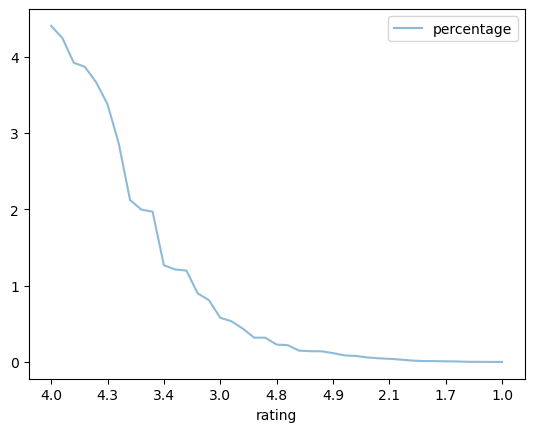

In [25]:
rating_df.plot(x='rating',y='percentage',alpha=0.5);

In [26]:
# City with most number of Restraunts
df.groupby('city')['id'].nunique().sort_values(ascending=False).head(20)

city
Bikaner                      1665
Noida-1                      1424
Indirapuram,Delhi            1279
BTM,Bangalore                1159
Rohini,Delhi                 1135
Kothrud,Pune                 1086
Indiranagar,Bangalore        1079
Electronic City,Bangalore    1039
Greater Kailash 2,Delhi      1037
Vashi,Mumbai                 1021
Kukatpally,Hyderabad         1008
Viman Nagar,Pune             1000
sohna road,Gurgaon            973
Koramangala,Bangalore         953
Laxmi Nagar,Delhi             930
Gomti Nagar,Lucknow           915
HSR,Bangalore                 898
Malviya Nagar,Delhi           896
Madhapur,Hyderabad            892
Wakad,Pune                    868
Name: id, dtype: int64

### Which City has the best food

In [27]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,-999.0,Too Few Ratings,200.0,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,-999.0,Too Few Ratings,250.0,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [28]:
df.rating_count.unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'],
      dtype=object)

In [29]:
CITY=df[df['rating_count'].isin({'100+ ratings','500+ ratings','1K+ ratings','5K+ ratings','10K+ ratings'})]

In [30]:
CITY.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
6,156588,shere punjab veg,Abohar,4.0,100+ ratings,150.0,North Indian,22120652000021,https://www.swiggy.com/restaurants/shere-punja...,"shere punjab veg, major surinder chowk near ve...",Menu/156588.json
38,351387,NIKKU VEG THALI,Abohar,4.1,100+ ratings,150.0,North Indian,22121652000183,https://www.swiggy.com/restaurants/nikku-veg-t...,"NIKKU VEG THALI, College Road, Near Railway Li...",Menu/351387.json
63,165533,IFC Restaurant,Adilabad,3.5,100+ ratings,400.0,American,13619001000093,https://www.swiggy.com/restaurants/ifc-restaur...,"IFC Restaurant, Jagadamba Towers, Gandhi Print...",Menu/165533.json
65,242943,Hot N Chill Restaurant,Adilabad,3.5,100+ ratings,150.0,"European,Italian",13619001000192,https://www.swiggy.com/restaurants/hot-n-chill...,"Hot N Chill Restaurant, H NO 4 -4 -703 BHUKTHA...",Menu/242943.json


In [33]:
CITY.dtypes

id                int64
name             object
city             object
rating           object
rating_count     object
cost            float64
cuisine          object
lic_no           object
link             object
address          object
menu             object
dtype: object

In [34]:
CITY['rating']=CITY['rating'].astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_4660\4028877978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CITY['rating']=CITY['rating'].astype(float)


In [37]:
CITY[CITY['rating']>4.5].city.value_counts().head()

Adyar,Chennai              20
Central Kolkata,Kolkata    18
Indiranagar,Bangalore      16
South Kolkata,Kolkata      16
Bandra West,Mumbai         13
Name: city, dtype: int64

#### These are the 5 cities with restraunts having the best rating

In [38]:
df.cost.sort_values(ascending=False)

70762     300350.0
21626       8000.0
47552       6000.0
47817       5023.0
107779      5000.0
            ...   
94098          1.0
109636         1.0
121078         1.0
148236         1.0
43814          1.0
Name: cost, Length: 148255, dtype: float64

<Axes: >

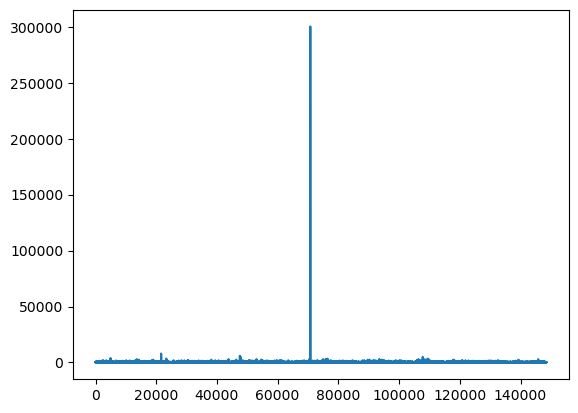

In [40]:
df.cost.plot()

#### This is due to an outlier

In [41]:
np.argmax(df['cost'])

70642

In [42]:
df.iloc[70642]

id                                                         477718
name                                               KOHINOOR HOTEL
city                                                   Hinganghat
rating                                                     -999.0
rating_count                                      Too Few Ratings
cost                                                     300350.0
cuisine                                      North Indian,Chinese
lic_no                                             21521269001428
link            https://www.swiggy.com/restaurants/kohinoor-ho...
address         KOHINOOR HOTEL, LIBOURY CHOWK TAKA GROUND NR-B...
menu                                             Menu/477718.json
Name: 70762, dtype: object

In [43]:
df=df[df['id']!= 477718]

<Axes: >

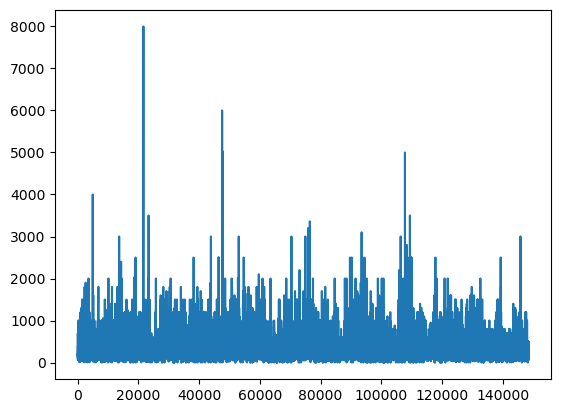

In [44]:
df.cost.plot()